<a href="https://colab.research.google.com/github/sunshine01910/eco.cva/blob/main/Taller_1_2022_09_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 1
* Maria Estefania Silva Leal
* Juliette Alexandra Garavito Tique
* Sara Lucia Pulido Reina

In [411]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
df = pd.read_csv('archivo.csv')

##Análisis exploratorio de los datos






In [413]:
df.head()

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0


In [414]:
df.tail()

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
46322,30195701,mujer,16,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46323,30195701,mujer,76,otro_pariente,viudo,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46324,30202911,hombre,61,jefe_hogar,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0
46325,30202911,mujer,60,pareja,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0
46326,30202911,hombre,65,otro_pariente,soltero,si,salud,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [416]:
df = df[df['parentesco_jefe_hogar'] == 'jefe_hogar'].reset_index(drop=True)

In [417]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
2,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,1050000.0
3,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0
4,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0
14025,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0
14026,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,5000000.0
14027,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0


In [418]:
df.isna().sum()

LLAVE_HOGAR                              0
sexo                                     0
edad                                     0
parentesco_jefe_hogar                    0
estado_civil                             0
viaje_noche_fuera                        0
motivo_viaje                         12411
compañía_viaje                       12411
destino_depto                        12411
destino_municipio                    12411
monto_ultimo_viaje                   12411
num_viajes_12_meses                  12428
destino_depto_12_meses               12411
destino_municipio_12_meses           12411
gastos_alojamiento_valor             13669
gastos_transporte_valor              12798
gastos_trans_publico_lugar_valor     13590
gastos_bienes_personales_valor       13765
gastos_regalos_valor                 13766
gastos_otros_valor                   13640
gastos_transporte_aereo_valor        13872
leer_escribir                            0
nivel_educativo                          0
grado_alcan

In [419]:
variables_relevantes = ['viaje_noche_fuera','sexo','edad','estado_civil','nivel_educativo','estrato','ingreso_mensual_aprox']

In [420]:
df = df[variables_relevantes]

In [421]:
df.isna().sum()

viaje_noche_fuera          0
sexo                       0
edad                       0
estado_civil               0
nivel_educativo            0
estrato                   12
ingreso_mensual_aprox    236
dtype: int64

###THID

In [422]:
df.tail()

,viaje_noche_fuera,sexo,edad,estado_civil,nivel_educativo,estrato,ingreso_mensual_aprox
14024,no,mujer,63,casado,superior_universitaria,2.0,9000000.0
14025,no,mujer,66,separado_divorciado,superior_universitaria,1.0,828116.0
14026,no,hombre,71,casado,media,4.0,5000000.0
14027,no,hombre,50,casado,media,3.0,3800000.0
14028,si,hombre,61,casado,media,2.0,4000000.0


In [423]:
df.head()

,viaje_noche_fuera,sexo,edad,estado_civil,nivel_educativo,estrato,ingreso_mensual_aprox
0,no,mujer,56,soltero,basica_primaria,1.0,880000.0
1,no,mujer,39,separado_divorciado,basica_secundaria,1.0,860000.0
2,no,mujer,68,viudo,basica_primaria,1.0,1050000.0
3,no,hombre,34,pareja_no_union_libre,basica_primaria,1.0,820000.0
4,no,hombre,25,pareja_union_libre,media,1.0,850000.0


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   viaje_noche_fuera      14029 non-null  object 
 1   sexo                   14029 non-null  object 
 2   edad                   14029 non-null  int64  
 3   estado_civil           14029 non-null  object 
 4   nivel_educativo        14029 non-null  object 
 5   estrato                14017 non-null  float64
 6   ingreso_mensual_aprox  13793 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 767.3+ KB


In [425]:
df.describe()

,edad,estrato,ingreso_mensual_aprox
count,14029.000000,14017.000000,1.379300e+04
mean,50.038278,2.261540,1.604475e+06
std,16.335275,1.109295,1.651129e+06
min,15.000000,0.000000,9.800000e+01
25%,37.000000,1.000000,8.000000e+05
50%,50.000000,2.000000,1.128000e+06
75%,62.000000,3.000000,2.000000e+06
max,102.000000,9.000000,3.000000e+07


###Limpieza

####Datos duplicados

In [426]:
df.duplicated().sum()

820

In [427]:
df.drop_duplicates()

,viaje_noche_fuera,sexo,edad,estado_civil,nivel_educativo,estrato,ingreso_mensual_aprox
0,no,mujer,56,soltero,basica_primaria,1.0,880000.0
1,no,mujer,39,separado_divorciado,basica_secundaria,1.0,860000.0
2,no,mujer,68,viudo,basica_primaria,1.0,1050000.0
3,no,hombre,34,pareja_no_union_libre,basica_primaria,1.0,820000.0
4,no,hombre,25,pareja_union_libre,media,1.0,850000.0
...,...,...,...,...,...,...,...
14024,no,mujer,63,casado,superior_universitaria,2.0,9000000.0
14025,no,mujer,66,separado_divorciado,superior_universitaria,1.0,828116.0
14026,no,hombre,71,casado,media,4.0,5000000.0
14027,no,hombre,50,casado,media,3.0,3800000.0


####Datos ausente

In [428]:
df.isna().sum()

viaje_noche_fuera          0
sexo                       0
edad                       0
estado_civil               0
nivel_educativo            0
estrato                   12
ingreso_mensual_aprox    236
dtype: int64

###Visualizaciones de los datos

In [429]:
sexo = df['sexo'].value_counts()
sexo

hombre    7988
mujer     6041
Name: sexo, dtype: int64

In [430]:
sexo.index

Index(['hombre', 'mujer'], dtype='object')

In [431]:
sexo.values

array([7988, 6041])

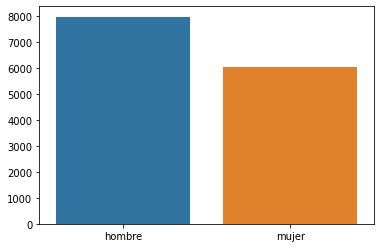

In [432]:
sns.barplot(x=sexo.index, y=sexo.values)

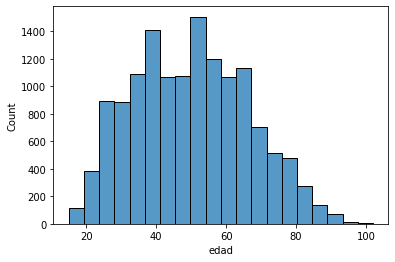

In [433]:
sns.histplot(df['edad'],bins=20)

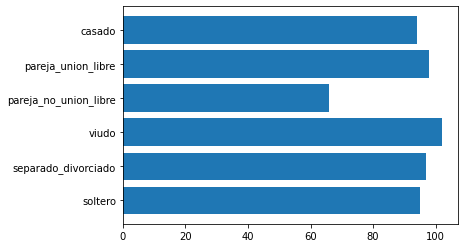

In [434]:
plt.barh(df['estado_civil'],df['edad'])
plt.show()

In [435]:
nivel_educativo = df['nivel_educativo'].value_counts()
nivel_educativo

superior_universitaria    4624
media                     3921
basica_primaria           3230
basica_secundaria         1753
ninguno                    491
preescolar                   6
no_sabe_no_informa           4
Name: nivel_educativo, dtype: int64

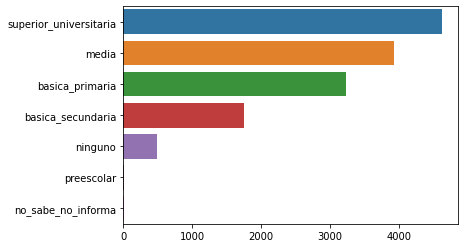

In [436]:
sns.barplot(x=nivel_educativo.values, y=nivel_educativo.index)

##Modelo

Datos bivariados con la variable dependiente y su transformación a número

In [437]:
df = df.replace({'viaje_noche_fuera':{'si':1,'no':0}})

In [438]:
df

,viaje_noche_fuera,sexo,edad,estado_civil,nivel_educativo,estrato,ingreso_mensual_aprox
0,0,mujer,56,soltero,basica_primaria,1.0,880000.0
1,0,mujer,39,separado_divorciado,basica_secundaria,1.0,860000.0
2,0,mujer,68,viudo,basica_primaria,1.0,1050000.0
3,0,hombre,34,pareja_no_union_libre,basica_primaria,1.0,820000.0
4,0,hombre,25,pareja_union_libre,media,1.0,850000.0
...,...,...,...,...,...,...,...
14024,0,mujer,63,casado,superior_universitaria,2.0,9000000.0
14025,0,mujer,66,separado_divorciado,superior_universitaria,1.0,828116.0
14026,0,hombre,71,casado,media,4.0,5000000.0
14027,0,hombre,50,casado,media,3.0,3800000.0


In [439]:
df = df.dropna()

In [440]:
df

,viaje_noche_fuera,sexo,edad,estado_civil,nivel_educativo,estrato,ingreso_mensual_aprox
0,0,mujer,56,soltero,basica_primaria,1.0,880000.0
1,0,mujer,39,separado_divorciado,basica_secundaria,1.0,860000.0
2,0,mujer,68,viudo,basica_primaria,1.0,1050000.0
3,0,hombre,34,pareja_no_union_libre,basica_primaria,1.0,820000.0
4,0,hombre,25,pareja_union_libre,media,1.0,850000.0
...,...,...,...,...,...,...,...
14024,0,mujer,63,casado,superior_universitaria,2.0,9000000.0
14025,0,mujer,66,separado_divorciado,superior_universitaria,1.0,828116.0
14026,0,hombre,71,casado,media,4.0,5000000.0
14027,0,hombre,50,casado,media,3.0,3800000.0


In [441]:
y = df['viaje_noche_fuera']
X = df[['edad','estrato','ingreso_mensual_aprox']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          1.50e-149
Time:                        09:05:14   Log-Likelihood:                -3672.1
No. Observations:               13781   AIC:                             7352.
Df Residuals:                   13777   BIC:                             7382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0986      0.010     10.172      0.000       0.080       0.118
edad                     -0.0019      0.000    -11.573      0.000      -0.002      -0.002
estrato                   0.0333      0.003     12.163      0.000       0.028       0.039
ingreso_mensual_aprox  2.589e-08   1.82e-09     14.202      0.000    2.23e-08    2.95e-08
==============================================================================
Omnibus:                     5601.800   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17573.458
Skew:                           2.198   Prob(JB):                         0.00
Kurtosis:                       6.360   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Análisis de resultados

*   Todas las variables (edad, estrato e ingresos mensuales aproximados) son significativas porque el Pvalor esta por debajo de 0.05 (nivel de significancia). También, porque dentro de sus intervalos de confianza, no se encuentra la hipótesis nula, es decir, el número 0
*   A medida que aumenta la edad, la probabilidad de viajar disminuye un 0.0019
*   A media que aumenta el estrato socio-económico, la probabilidad de viajar aumenta un 0.0333
*   Cuando se tiene mayores ingresos mensuales, hay un aumento en la probabilidad de viajar

**Nota:** el modelo esta filtrado para los jefes del hogar, lo que implica que el análisis esta dirigido a las familias